In [1]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
from math import log
import matplotlib.pyplot as plt
import nltk as nltk
import os
from nltk.stem import PorterStemmer
from nltk import (corpus, word_tokenize, WordNetLemmatizer, pos_tag)
from nltk.corpus import stopwords 
from sklearn import (feature_extraction, datasets, linear_model, naive_bayes, ensemble, model_selection)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
reviews_df = pd.read_csv('C:\Amardeep\Mtech\Syllabus and Materials\Semester 3\Assignment NLP\movie_review\movie_review.csv')
reviews_df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


# New Section

<AxesSubplot:xlabel='tag', ylabel='count'>

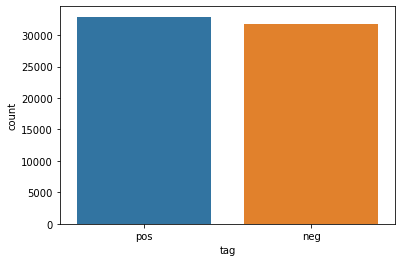

In [ ]:
#Check for positive and negative labels to check if the data is balanced or not

sns.countplot(x='tag',data=reviews_df)

In [ ]:
x = reviews_df['text'].values
y = reviews_df['tag'].values

In [ ]:
# creating labels 

y = [1 if (i == "pos") else 0 for i in y]

In [ ]:
# this stemmer-tokenizer will not include stop words, punctuation or special character
stopWords = corpus.stopwords.words("english")
class stemTokenizer:
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.token_pattern = re.compile(r"\b[A-Za-z0-9']{2,}\b")
        
    def __call__(self, sent):
        sent = re.findall(self.token_pattern, sent)
        return [self.stemmer.stem(word) for word in sent if word not in stopWords]
    
# create Count Vectorizer tokenizer

cv_data = feature_extraction.text.CountVectorizer(tokenizer = stemTokenizer()) 

In [ ]:
X = cv_data.fit_transform(x)

In [ ]:
# splitting features and labels into training and testing data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [ ]:
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
print("Accuracy with normal features using Multinomial Naive Bayes:\n", nb.score(X_test, y_test))

Accuracy with normal features using Multinomial Naive Bayes:
 0.7014318088174701


In [ ]:
nb_classifier = naive_bayes.MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(
        y_test, y_pred, labels = [0, 1])

print(acc_score)
print(conf_mat)

0.7014318088174701
[[6572 2820]
 [2977 7047]]


<AxesSubplot:>

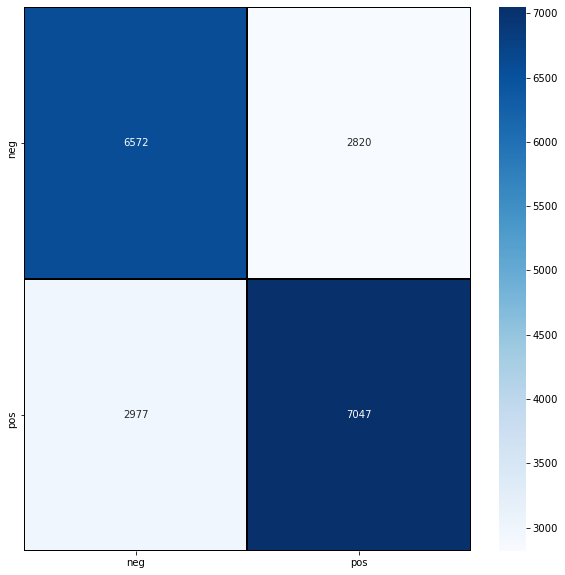

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['neg','pos'] , yticklabels = ['neg','pos'])

In [ ]:
# Display the POS tagging on the first 4 rows of ‘text’
from nltk.tokenize import word_tokenize
n=0
for n in range(4):
    text = x[n]
    text = word_tokenize(text)
    print(nltk.pos_tag(text))
    n = n+1

[('films', 'NNS'), ('adapted', 'VBD'), ('from', 'IN'), ('comic', 'JJ'), ('books', 'NNS'), ('have', 'VBP'), ('had', 'VBD'), ('plenty', 'NN'), ('of', 'IN'), ('success', 'NN'), (',', ','), ('whether', 'IN'), ('they', 'PRP'), ("'re", 'VBP'), ('about', 'IN'), ('superheroes', 'NNS'), ('(', '('), ('batman', 'NN'), (',', ','), ('superman', 'NN'), (',', ','), ('spawn', 'NN'), (')', ')'), (',', ','), ('or', 'CC'), ('geared', 'VBN'), ('toward', 'IN'), ('kids', 'NNS'), ('(', '('), ('casper', 'NN'), (')', ')'), ('or', 'CC'), ('the', 'DT'), ('arthouse', 'NN'), ('crowd', 'NN'), ('(', '('), ('ghost', 'JJ'), ('world', 'NN'), (')', ')'), (',', ','), ('but', 'CC'), ('there', 'EX'), ("'s", 'VBZ'), ('never', 'RB'), ('really', 'RB'), ('been', 'VBN'), ('a', 'DT'), ('comic', 'JJ'), ('book', 'NN'), ('like', 'IN'), ('from', 'IN'), ('hell', 'NN'), ('before', 'IN'), ('.', '.')]
[('for', 'IN'), ('starters', 'NNS'), (',', ','), ('it', 'PRP'), ('was', 'VBD'), ('created', 'VBN'), ('by', 'IN'), ('alan', 'NN'), ('moore

In [2]:
import spacy
from spacy import displacy
nlp=spacy.load('en_core_web_sm')
text = "Following Jon's death in a mutiny, he is one of Jon's loyalists who find his body and barricade themselves inside his quarters, refusing to acknowledge Thorne's leadership."
displacy.render(nlp(text),jupyter=True)